# Exercise: AutoGluon

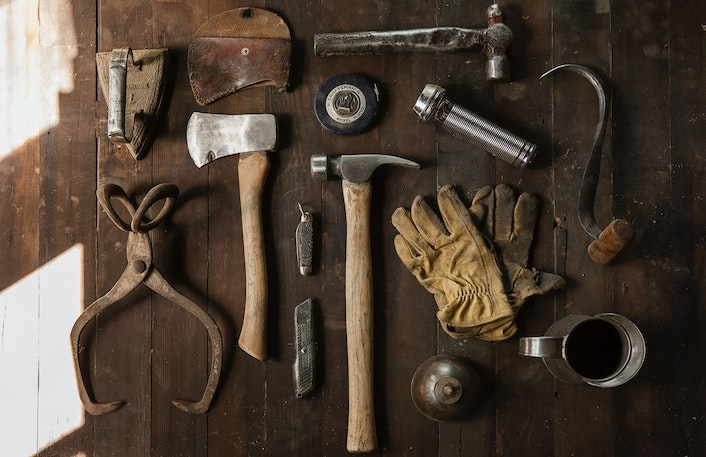

Throughout this lesson, you've been trying different models on the same two datasets, wine and diabetes. Now, we're going to try our hand at accelerating this methodology by using AutoGluon. In this exercise, train two different AutonGluon models and see how they compare to previous iterations in exercise 1 and 2.

You're tasked with completing the following steps:
1. Load in the wine dataset from scikit learn.
2. For the wine dataset, create a train and test split, 80% train / 20% test.
3. Create a AutoGluon Classifier model with these hyper parameters:
    1. time_limit: 120
    2. presets: best_quality
4. Output the model table summary
5. Evaluate the trained model on the test dataset
6. Load the diabetes dataset from scikit learn
7. For the Diabetes dataset, create a train and test split, 80% train / 20% test.
8. Create a AutoGluon Regression model with these hyper parameters:
    1. eval_metric: r2
    2. time_limit: 120
    3. presets: best_quality
9. Output the model table summary
10. Evaluate the trained model on the test dataset

## Setup

### Open up Sagemaker Studio

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

In [1]:
! python --version

Python 3.6.3


In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularDataset, TabularPredictor

## AutoGluon Classifier

In [ ]:
# Load in the wine dataset
wine = datasets.load_wine()

In [ ]:
# Create the wine `data` dataset as a dataframe and name the columns with `feature_names`
df = pd.DataFrame(wine["data"], columns=wine["feature_names"])

# Include the target as well
df["target"] = wine["target"]

In [ ]:
# Split your data with these ratios: train: 0.8 | test: 0.2
df_train, df_test = train_test_split(df, test_size=0.2, random_state=0)

In [ ]:
# How does the model perform on the training dataset and default model parameters?
# Using the hyperparameters in the requirements, is there improvement?
# Remember we use the test dataset to score the model
# No need to explicitly say this is a classifier, autogluon will pick it up
predictor = TabularPredictor(label="target").fit(
    train_data=df_train, time_limit=120, presets="best_quality"
)

In [ ]:
# Output the fit summary of the training run
predictor.fit_summary()

In [ ]:
# Output the model's `score_val` in a bar chart to compare performance
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [ ]:
# Evaluate the models performance on the test dataset
performance = predictor.evaluate(df_test)

## AutoGluon Regression

In [ ]:
# Load in the diabetes dataset
diabetes = datasets.load_diabetes()

In [ ]:
# Create the diabetes `data` dataset as a dataframe and name the columns with `feature_names`
dfd = pd.DataFrame(diabetes["data"], columns=diabetes["feature_names"])

# Include the target as well
dfd["target"] = diabetes["target"]

In [ ]:
# Split your data with these ratios: train: 0.8 | test: 0.2
dfd_train, dfd_test = train_test_split(dfd, test_size=0.2, random_state=0)

In [ ]:
# How does the model perform on the training dataset and default model parameters?
# Using the hyperparameters in the requirements, is there improvement?
# Remember we use the test dataset to score the model
# Since we are using a different eval_metric, we'll need to assign the problem_type
predictor = TabularPredictor(
    label="target", problem_type="regression", eval_metric="r2"
).fit(
    train_data=dfd_train,
    time_limit=120,
    presets="best_quality",
)

In [ ]:
# Output the fit summary of the training run
predictor.fit_summary()

In [ ]:
# Output the model's `score_val` in a bar chart to compare performance
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [ ]:
# Evaluate the models performance on the test dataset
performance = predictor.evaluate(dfd_test)